# $\verb|FishLSS|$ tutorial

In [1]:
# import revelant packages
from headers import *
from twoPoint import *
from twoPointNoise import *
from notebook_helper_functions import *

## (1) Setting up a $\verb|FishLSS|$ forecast

### (1a) The cosmology

A $\verb|FishLSS|$ forecast requires two main ingredients: a cosmology and an experiment. For the input cosmology, we use a $\verb|CLASS|$ object:

In [2]:
params = {'output': 'tCl lCl mPk',
          'l_max_scalars': 1000,
          'lensing': 'yes',
          'P_k_max_h/Mpc': 2.,
          'non linear':'halofit', 
          'z_pk': '0.0,1087',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'alpha_s': 0.,
          'h': 0.6770,
          'N_ur': 1.0196,
          'N_ncdm': 2,
          'm_ncdm': '0.01,0.05',
          'tau_reio': 0.0568,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923,
          'Omega_k': 0.}

cosmo = Class() 
cosmo.set(params) 
cosmo.compute() 

### (1b) The experiment

Now we specify the experiment, which is an instance of $\verb|experiment.py|$. At a minimum, we need to specify the redshift range of the survey ($z_\text{min}$ and $z_\text{max}$), the redshift binning, the sky coverage $f_\text{sky}$, the linear bias $b(z)$, and the number density $\bar{n}(z)$. The redshift binning can be specified in two ways: you can either input a `zedges` (numpy array) to specify the edges of the bins, or `nbins` (integer), in which case the redshift bins are assumed to be linearly spaced in $z$. Here we set `nbins = 3` for simplicity, so that we have three redshift bins with $\Delta z=1$.

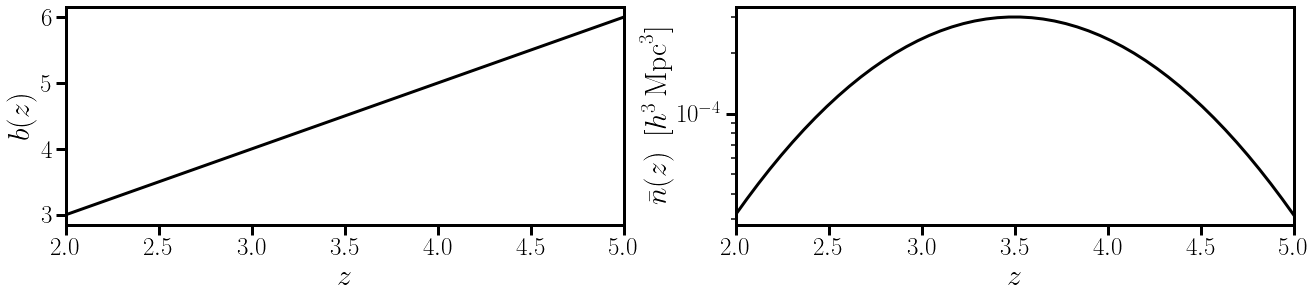

In [3]:
# inputs to an experiment object

zmin = 2.
zmax = 5.
nbins = 3
fsky = 0.5

b = lambda z: (1+z) 
n = lambda z: 3e-4 * np.exp(-(z-3.5)**2)

#############################################
#############################################

# let's take a look at the bias and number density
fig, ax = plt.subplots(1,2,figsize=(22,4))
zs = np.linspace(2,5,50)
ax[0].plot(zs,b(zs),lw=3,c='k')
ax[1].semilogy(zs,n(zs),lw=3,c='k')
for i in range(2): 
   ax[i].set_xlim(2,5)
   ax[i].set_xlabel(r'$z$')
ax[0].set_ylabel(r'$b(z)$')
ax[1].set_ylabel(r'$\bar{n}(z)\,\,\,[h^3\,\text{Mpc}^3]$')
plt.show()

We can now create the experiment:

In [4]:
exp = experiment(zmin=zmin, zmax=zmax, nbins=nbins, fsky=fsky, b=b, n=n)

While not 

### (1c) The forecast

In [5]:
forecast = fisherForecast(experiment=exp,cosmo=cosmo,Nk=1000,Nmu=50,velocileptors=True,name='example')

## (2) Computing derivatives

### (2a) Full shape measurements

### (2b) Lensing and cross-correlations

### (2c) BAO reconstruction

## (3) Computing Fisher matrices

## (4) CMB priors

## (5) Combined forecasts